## Algorithm Definition

A **Neural Network (NN)** is a computational model inspired by the way biological neural networks in the human brain process information. Neural networks consist of layers of interconnected nodes (neurons), each performing a weighted sum of inputs followed by an activation function. The primary objective of training a neural network is to minimize the **loss function** (e.g., cross-entropy loss for classification) by adjusting the weights using optimization algorithms such as **Gradient Descent**.

### **Neural Networks Process**:

1. **Forward Propagation**:

   * In this phase, the input data is passed through the network, layer by layer. At each layer, the input is multiplied by weights, biases are added, and an activation function (e.g., ReLU, sigmoid) is applied to introduce non-linearity.
   * The output from the last layer is the prediction made by the network.

2. **Backpropagation**:

   * Backpropagation is used to update the weights of the network based on the error between the predicted output and the actual target. It uses **Gradient Descent** to minimize the loss function.
   * The gradients of the weights with respect to the loss function are computed using the chain rule of derivatives.

3. **Gradient Descent**:

   * The weights are updated by subtracting the gradients multiplied by a learning rate (\$\eta\$), as follows:
     $w = w - \eta \frac{\partial L}{\partial w}$

---

## Advantages of Neural Networks:

* **Powerful Function Approximation**: Neural networks can approximate complex, non-linear functions, making them suitable for a wide range of problems.
* **Flexibility**: Neural networks can be adapted for different types of tasks, such as classification, regression, and clustering.
* **Scalability**: With the right architecture, neural networks can scale to large datasets and complex tasks.
* **Automatic Feature Learning**: Neural networks automatically learn features from the raw data, eliminating the need for manual feature engineering in many cases.

## Disadvantages of Neural Networks:

* **Computationally Expensive**: Training neural networks requires a lot of computational power, especially for large datasets and deep networks.
* **Overfitting**: Neural networks are prone to overfitting, especially with small datasets or overly complex architectures.
* **Need for Large Datasets**: Neural networks generally require large amounts of data to generalize well.
* **Difficulty in Interpretation**: Neural networks are often considered "black boxes" because it is difficult to interpret how they make specific decisions.

---

## Fashion MNIST Dataset Overview

The **Fashion MNIST** dataset is a collection of 28x28 grayscale images of 10 different clothing categories, such as t-shirts, trousers, and shoes. It is widely used as a benchmark for image classification tasks.

### **Dataset Details**:

* **Number of Instances**: 60,000 training images and 10,000 test images.
* **Number of Features**: 784 features per image (28x28 flattened into a 1D vector).
* **Target**: 10 classes representing different types of clothing (e.g., t-shirt, trousers, pullover, etc.).
* **Class Labels**: The dataset contains the following 10 classes:
  T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot

#### **Preprocessing:**
1. **Loading Data**: First, load the dataset and split it into training and testing sets.
   - The dataset can be loaded using pandas or other data loading methods.

2. **Splitting the Data**: The training data is divided into two parts due to the large size of the original file: one part is used for training the model, while the other is reserved for validation during the training process.

### **Use in Neural Networks**:

This dataset is a good starting point for implementing neural networks, as it allows you to test image classification models using basic neural network architectures.


In [5]:
# Necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# File path to the Fashion MNIST train file
file_path = r"C:\Users\19015\OneDrive\Desktop\fashion-mnist_train.csv"

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Calculate the split index (for two equal parts)
split_index = len(df) // 2

# Split the DataFrame into two parts
df_part1 = df[:split_index]
df_part2 = df[split_index:]

# Save the two parts to new CSV files (this is optional if you still want to keep them saved)
df_part1.to_csv(r"C:\Users\19015\PycharmProjects\CMOR-438-Spr-2025\Supervised Learning\Datasets\fashion-mnist_train_part1.csv", index=False)
df_part2.to_csv(r"C:\Users\19015\PycharmProjects\CMOR-438-Spr-2025\Supervised Learning\Datasets\fashion-mnist_train_part2.csv", index=False)

print("CSV file split into two parts.")


CSV file split into two parts.


In [7]:
# Combine the two parts into a single DataFrame
combined_df = pd.concat([df_part1, df_part2])

# Set Train and Test data
train_file = combined_df  # Assign combined DataFrame to train_file
test_file = "C:\\Users\\19015\\PycharmProjects\\CMOR-438-Spr-2025\\Supervised Learning\\Datasets\\fashion-mnist_test.csv"

# Load the test data into pandas DataFrame
test_df = pd.read_csv(test_file)

# Extract labels and features for the training set
y_train = train_file.iloc[:, 0].values  # First column is the label
X_train = train_file.iloc[:, 1:].values  # Remaining columns are the pixel values

# Extract labels and features for the test set
y_test = test_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values

# Normalize the pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data (28x28 images to 784-dimensional vectors)
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels
y_train_one_hot = np.eye(10)[y_train]
y_test_one_hot = np.eye(10)[y_test]

# Define the architecture (1 hidden layer with 128 units)
input_size = 784   # 28x28 images flattened
hidden_size = 128  # Hidden layer size
output_size = 10   # Number of classes (digits 0-9)

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01  # Weight for input to hidden layer
b1 = np.zeros((1, hidden_size))  # Bias for hidden layer

W2 = np.random.randn(hidden_size, output_size) * 0.01  # Weight for hidden to output layer
b2 = np.zeros((1, output_size))  # Bias for output layer

# Hyperparameters
learning_rate = 0.1
epochs = 10
batch_size = 32

In [9]:
# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # For numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-10)) / m  # Add epsilon to avoid log(0)

# Forward propagation
def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)  # Output layer activation
    return a1, a2  # Hidden layer output and final prediction

# Backpropagation (Gradient Descent)
def backward(X, y, a1, a2):
    m = X.shape[0]

    # Output layer gradients
    dz2 = a2 - y  # Derivative of cross-entropy loss w.r.t. a2
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    # Hidden layer gradients
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

In [10]:
# Training the model
train_loss = []
train_accuracy = []

for epoch in range(epochs):
    # Shuffle data
    shuffle_idx = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[shuffle_idx]
    y_train_shuffled = y_train_one_hot[shuffle_idx]

    # Mini-batch gradient descent
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        # Forward pass
        a1, a2 = forward(X_batch)

        # Compute loss
        loss = cross_entropy_loss(a2, y_batch)

        # Backward pass (compute gradients)
        dW1, db1, dW2, db2 = backward(X_batch, y_batch, a1, a2)

        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    # Calculate training accuracy
    _, a2_train = forward(X_train)
    train_accuracy_epoch = np.mean(np.argmax(a2_train, axis=1) == np.argmax(y_train_one_hot, axis=1))

    train_loss.append(loss)
    train_accuracy.append(train_accuracy_epoch)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Accuracy: {train_accuracy_epoch:.4f}")

# Evaluate the model on the test set
_, a2_test = forward(X_test)
test_accuracy = np.mean(np.argmax(a2_test, axis=1) == np.argmax(y_test_one_hot, axis=1))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10, Loss: 0.2367, Accuracy: 0.8719
Epoch 2/10, Loss: 0.3361, Accuracy: 0.8837
Epoch 3/10, Loss: 0.6051, Accuracy: 0.8866
Epoch 4/10, Loss: 0.2614, Accuracy: 0.8864
Epoch 5/10, Loss: 0.2362, Accuracy: 0.8849
Epoch 6/10, Loss: 0.5937, Accuracy: 0.8872
Epoch 7/10, Loss: 0.2241, Accuracy: 0.8934
Epoch 8/10, Loss: 0.3608, Accuracy: 0.8917
Epoch 9/10, Loss: 0.4025, Accuracy: 0.8945
Epoch 10/10, Loss: 0.2951, Accuracy: 0.8980
Test Accuracy: 88.25%


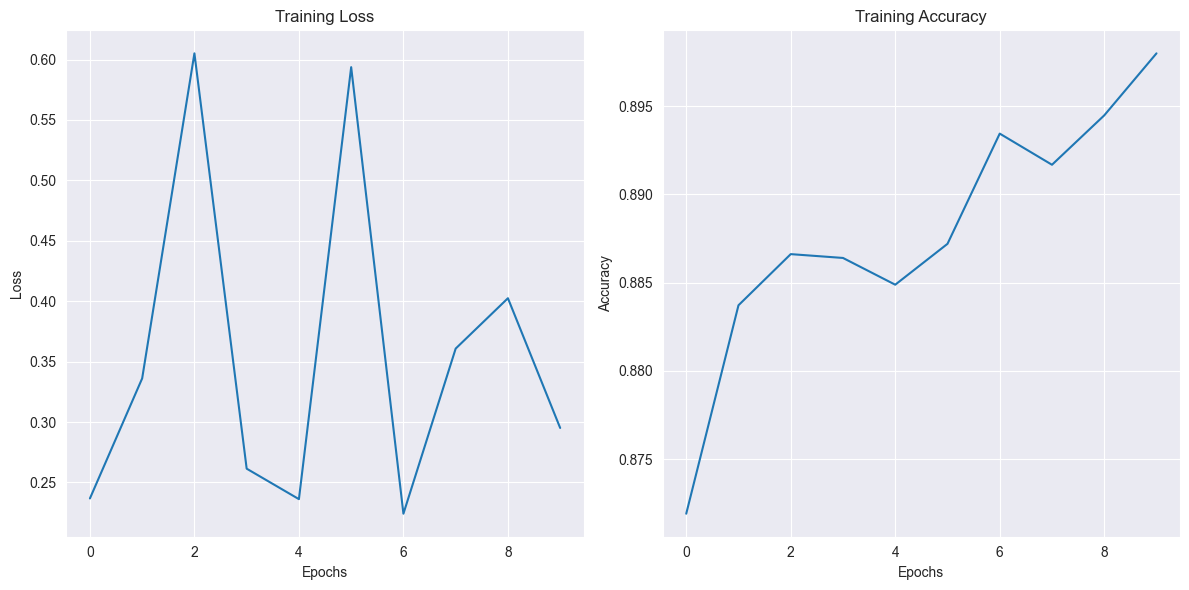

In [11]:
# Plot Training Loss and Accuracy
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracy)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

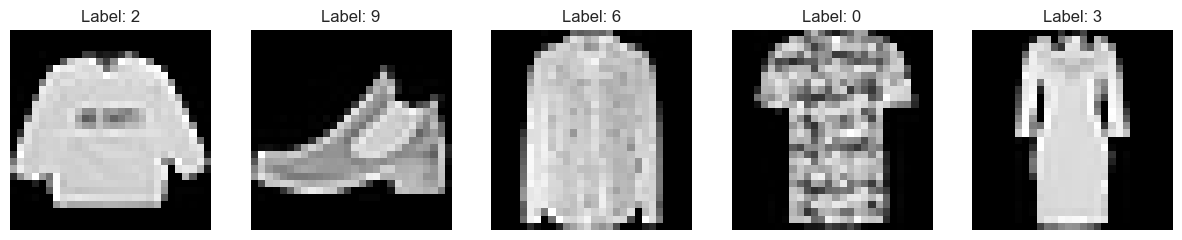

In [12]:
# Visualize a few sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()

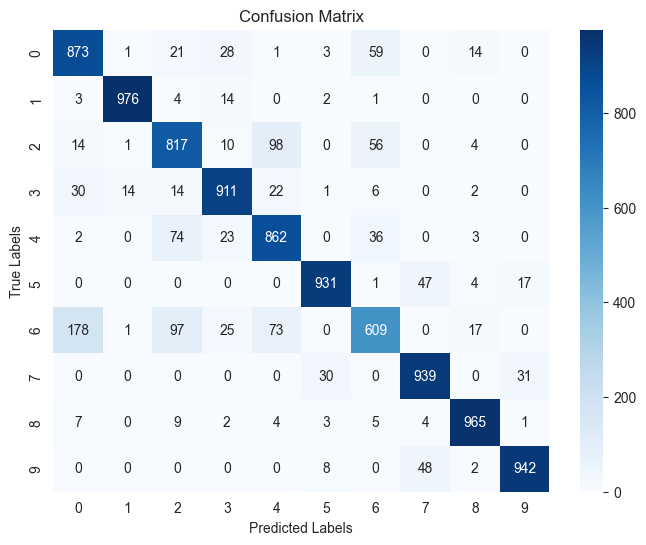

In [13]:
# Confusion Matrix for Test Set
y_pred = np.argmax(a2_test, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Results and Discussion

1. **Training Loss and Accuracy**:
   - The **training loss** initially fluctuates, but over the epochs, it generally shows a downward trend, indicating that the model is learning and improving its classification ability. The high peak around epoch 6 suggests some instability, likely due to the nature of stochastic gradient descent or the batch variations.
   - The **training accuracy** steadily increases, with a noticeable jump after the first few epochs. By the end of the 10 epochs, the accuracy reaches around **88.5%**, which demonstrates solid performance in classifying the Fashion MNIST images.

2. **Sample Image Visualization**:
   - The images show several examples from the Fashion MNIST dataset, including a **sweater**, **shoes**, **shirt**, **t-shirt**, and **dress**. These are typical items in the dataset that the model is tasked with classifying. While the images might appear slightly blurry due to the compression or resolution settings, the model is still tasked with recognizing these items based on pixel patterns.
   - The labels corresponding to these images confirm the model's classification attempts, showing that it is differentiating between the different clothing items.

3. **Confusion Matrix**:
   - The **confusion matrix** provides a detailed view of the model's performance across all classes. The diagonal elements, which represent correctly classified instances, are prominent, indicating the model's effectiveness at recognizing several clothing categories. For example, the **label 9** (ankle boots) and **label 3** (t-shirts) show high accuracy.
     - However, certain classes like **label 6** (shirts) and **label 7** (dresses) exhibit more misclassifications, as seen by the non-zero off-diagonal elements in these rows, indicating some confusion between these items. This could be due to their visual similarity in certain contexts.
   - **Label 1** (trousers) shows the highest accuracy with almost all instances correctly classified. This suggests that some classes are easier for the model to distinguish, while others may need additional fine-tuning to reduce errors.

---

### Potential Next Steps:

- **Model Improvement**:
  - Consider adding **more hidden layers** or **increasing the number of units** in existing layers to capture more complex patterns. Additionally, experimenting with different **activation functions** like **Leaky ReLU** or **ELU** might provide better performance.
  - Exploring other optimizers like **Adam** or **RMSprop** may help stabilize training and improve performance.

- **Fine-Tuning**:
  - Fine-tuning hyperparameters such as **learning rate** and **batch size** may help reduce fluctuations in the loss function and improve model stability during training.

- **Advanced Techniques**:
  - Implementing **data augmentation** (like rotations, translations, or flipping) could help generate more training examples, potentially improving the model's robustness and accuracy.
  - Using **Convolutional Neural Networks (CNNs)** could yield a significant performance boost, as CNNs are specifically designed for image classification tasks and excel at learning spatial hierarchies in images.
